In [2]:
%matplotlib inline

## pyPIDtoolbox

Import the libs first:

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.fftpack import fft,ifft
from numpy.fft import rfft,irfft
import pandas as pd 
import io
import os

try open csv file using Panda:

In [4]:
df=pd.read_csv('debug_log_2.csv') 
df.head()

,loopIteration,time,axisP[0],axisP[1],axisP[2],axisI[0],axisI[1],axisI[2],axisD[0],axisD[1],...,axisSum[2],rcCommands[0],rcCommands[1],rcCommands[2],rcCommands[3],axisError[0],axisError[1],axisError[2],Unnamed: 55,Unnamed: 56
0,0,39159507,-8,0,-1,0,0,0,-1,-6,...,-1,-10,0,0,1.6,7,0,1,NaN,NaN
1,2,39160007,-9,0,-1,0,0,0,-1,-5,...,-1,-10,0,0,1.6,7,0,1,NaN,NaN
2,4,39160510,-9,0,-1,0,0,0,-2,-3,...,-1,-10,0,0,1.5,7,0,1,NaN,NaN
3,6,39161008,-10,0,0,0,0,0,-3,0,...,0,-10,0,0,1.5,8,0,1,NaN,NaN
4,8,39161505,-10,1,0,0,0,0,-6,2,...,0,-10,0,0,1.8,8,0,1,NaN,NaN


In [5]:
df.columns

Index(['loopIteration', 'time', 'axisP[0]', 'axisP[1]', 'axisP[2]', 'axisI[0]',
       'axisI[1]', 'axisI[2]', 'axisD[0]', 'axisD[1]', 'axisF[0]', 'axisF[1]',
       'axisF[2]', 'rcCommand[0]', 'rcCommand[1]', 'rcCommand[2]',
       'rcCommand[3]', 'setpoint[0]', 'setpoint[1]', 'setpoint[2]',
       'setpoint[3]', 'vbatLatest', 'amperageLatest', 'gyroADC[0]',
       'gyroADC[1]', 'gyroADC[2]', 'accSmooth[0]', 'accSmooth[1]',
       'accSmooth[2]', 'debug[0]', 'debug[1]', 'debug[2]', 'debug[3]',
       'motor[0]', 'motor[1]', 'motor[2]', 'motor[3]', 'flightModeFlags',
       'stateFlags', 'failsafePhase', 'rxSignalReceived',
       'rxFlightChannelsValid', 'heading[0]', 'heading[1]', 'heading[2]',
       'axisSum[0]', 'axisSum[1]', 'axisSum[2]', 'rcCommands[0]',
       'rcCommands[1]', 'rcCommands[2]', 'rcCommands[3]', 'axisError[0]',
       'axisError[1]', 'axisError[2]', 'Unnamed: 55', 'Unnamed: 56'],
      dtype='object')

In [6]:

#data=df[['rcCommand[3]','gyroADC[0]', 'gyroADC[1]', 'gyroADC[2]']].values.T
#data=df[['rcCommand[1]','vbatLatest', 'amperageLatest', 'gyroADC[0]']].values.T
#data=df[[ 'setpoint[0]','setpoint[1]','setpoint[2]', 'rcCommand[3]','debug[0]','debug[1]','debug[2]']].values.T
setpointData = df[[ 'setpoint[0]','setpoint[1]','setpoint[2]']].values.T
gyroADCData = df[[ 'gyroADC[0]', 'gyroADC[1]', 'gyroADC[2]']].values.T
gyroScaleData = df[[ 'debug[0]','debug[1]','debug[2]']].values.T
thrData = df[['rcCommand[3]']].values.T[0]
print(setpointData)
print(gyroADCData)
print(gyroScaleData)
print(thrData)

[[-10 -10 -10 ...  23  23  23]
 [  0   0   0 ...  -2  -2  -2]
 [  0   0   0 ...   0   0   0]]
[[-3 -3 -3 ... 34 34 34]
 [ 0  0  0 ... -4 -4 -4]
 [ 1  1  1 ... -1 -1  0]]
[[ -4 -11 -15 ...  31  26  25]
 [ -5  -3   0 ...  -8  -8  -9]
 [ -4  -3  -2 ...   7   5   2]]
[1000 1000 1000 ... 1166 1166 1166]


105


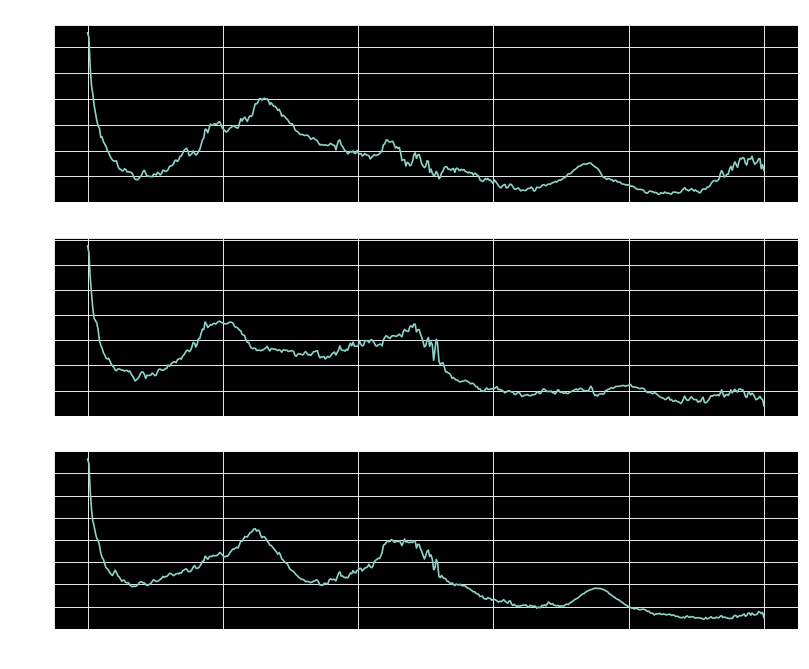

In [7]:
i = 105
print(i)
#fft_data=fft(data[1][512*i:], 512)
#print(data[3][512*i:512*i+512])
#plt.plot(fft_data[2:1000])
#realPart=
#plt.subplot(1,2,1)

#plt.psd(data[1][512*i:512*i+512],512,2000)
plt.figure(figsize=(12, 10), dpi= 80)
plt.subplot(3,1,1)
plt.title('roll')
plt.psd(gyroScaleData[0],1024,2000)
plt.subplot(3,1,2)
plt.title('pitch')
plt.psd(gyroScaleData[1],1024,2000)
plt.subplot(3,1,3)
plt.title('yaw')
plt.psd(gyroScaleData[2],1024,2000)
#plt.plot(np.array(range(1,256))*2000/512, np.abs(fft_data)[1:256]/512)
#plt.subplot(1,2,2)
#plt.plot(data[1][512*i:512*i+512])
i=i+1

In [8]:
signal = gyroScaleData[0]
thr = thrData #1000~2000
bufferSize = 512
batch = int(len(signal)/bufferSize)
thrfft = np.zeros((100, int(bufferSize/2)), dtype=np.float64)
#timefft = np.zeros((len(signal)-bufferSize, int(bufferSize/2)), dtype=np.float64)
thrCount = np.zeros(100, dtype=np.int32)

#print(thr)
#print(batch)

for i in range(0, len(signal)-bufferSize, 10):
    idx = i
    #print(np.sum(thr[idx:idx+bufferSize])/bufferSize)
    avgThr = int(np.sum(thr[idx:idx+bufferSize])/bufferSize/10) - 100
    if avgThr < 0:
        avgThr = 0
    if avgThr > 99:
        avgThr = 99
    #print(avgThr)
    fft_data = fft(np.hanning(bufferSize) * signal[idx:idx+bufferSize], bufferSize)
    realPart = np.abs(np.real(fft_data[:int(bufferSize/2)]))/bufferSize*2
    #timefft[i]+=realPart
    thrfft[avgThr]= thrfft[avgThr]+realPart
    thrCount[avgThr] += 1
    
for i in range(100):
    if thrCount[i] != 0:
        thrfft[i]=thrfft[i]/thrCount[i]
#print(thrfft)
#plt.imshow(bitmap)
#plt.hist(bitmap, bins=256, range=(0.0, 256.0))
    

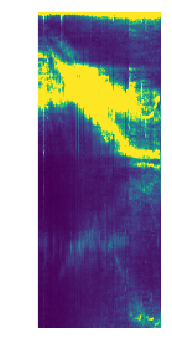

In [9]:
plt.figure(figsize=(2, 14), dpi= 80)
plt.imshow(thrfft.T, vmax=1)
#plt.colorbar()

In [21]:
def smooth(x, wnd):
    # x: NumPy 1-D array containing the data to be smoothed
    # wnd: smoothing window size needs, which must be odd number,
    # as in the original MATLAB implementation
    out0 = np.convolve(x,np.ones(wnd,dtype=int),'valid')/wnd
    r = np.arange(1,wnd-1,2)
    start = np.cumsum(x[:wnd-1])[::2]/r
    stop = (np.cumsum(x[:-wnd:-1])[::2]/r)[::-1]
    return np.concatenate((  start , out0, stop  ))

189968
482


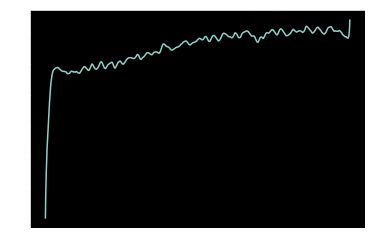

In [28]:
segment_length= 2048
wnd=1024;               # 500ms step response function, length will depend on lograte  
StepRespDuration_ms=500 # max dur of step resp in ms for plotting
rateHighThreshold=500   # degs/s
skipRate = 0.10

gyro_signal = gyroADCData[2]
setpoint_signal = setpointData[2]
step_response = np.zeros((1000, segment_length), dtype=np.float64)

print(len(gyro_signal))

seg_vector = range(0, len(gyro_signal)-segment_length, round(segment_length*skipRate))
j = 0
for i in seg_vector:
    Xseg = setpoint_signal[i:i+segment_length]
    if np.max(np.abs(Xseg)) < 20:
        continue
    Yseg = gyro_signal[i:i+segment_length]
    x_fft = rfft(np.hamming(segment_length) * Xseg)
    y_fft = rfft(np.hamming(segment_length) * Yseg)
    H=x_fft/len(x_fft)
    G=y_fft/len(y_fft)
    Hcon=np.conj(H)
    imp = np.real(irfft((G * Hcon) / (H * Hcon + .0001)))# impulse response function, .0001 to avoid divide by 0
    resp = np.cumsum(smooth(imp, 21))
    resp = resp - resp[0]
    #plt.plot(resp)
    #break
    step_response[j,:] = resp
    #print(step_response[0])
    #break
    j=j+1

    if j>=1000:
        break
#plt.plot(np.max(step_response, axis=0)) 
plt.plot(np.sum(step_response, axis=0)/j)
#plt.plot(np.min(step_response, axis=0))
print(j)


